# Reference


<img src="https://bimage.interpark.com/partner/goods_image/5/1/9/3/328045193g.jpg" width="200px"></img> <img src="https://bimage.interpark.com/partner/goods_image/4/9/7/7/332334977g.jpg" width="200px"></img> 

# 비지도학습 (Unsupervised Learning)

앞에서 배웠던 지도학습 (Supervised Learning) 방법과 달리 입력 데이터에 대한 정답(라벨)이 주어지지 않습니다.

지도학습은 데이터에 대한 정답값을 예측하는 것이 목표였다면, 비지도학습은 데이터의 차원을 축소하거나 비슷한 것끼리 군집화하는 것이 목표가 됩니다.

<img src="https://i.imgur.com/njlMkzl.png" width="500px">

# PCA

Priciple Component Analysis

현재 가장 많이 사용하는 차원 축소 기법

- Feature 의 갯수를 줄인다
- 주요 특징들을 추출한다
- (데이터가 줄어드니) 계산 비용이 감소한다
- 전반적인 경향을 사람이 이해하기 쉽다

자세한 설명: https://excelsior-cjh.tistory.com/167

## Iris 데이터셋을 사용한 PCA

<img src="https://i.imgur.com/TncuyEX.png" width="600px">

### Iris 데이터셋 로드

In [1]:
from sklearn.datasets import load_iris
import pandas as pd

iris = load_iris()

df = pd.DataFrame(iris['data'], columns=iris['feature_names'])
df['target'] = iris['target']
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


### PCA 수행

In [2]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)

data = pca.fit_transform(df.drop(columns=['target']))

data[:5]

array([[-2.68412563,  0.31939725],
       [-2.71414169, -0.17700123],
       [-2.88899057, -0.14494943],
       [-2.74534286, -0.31829898],
       [-2.72871654,  0.32675451]])

### PCA 시각화

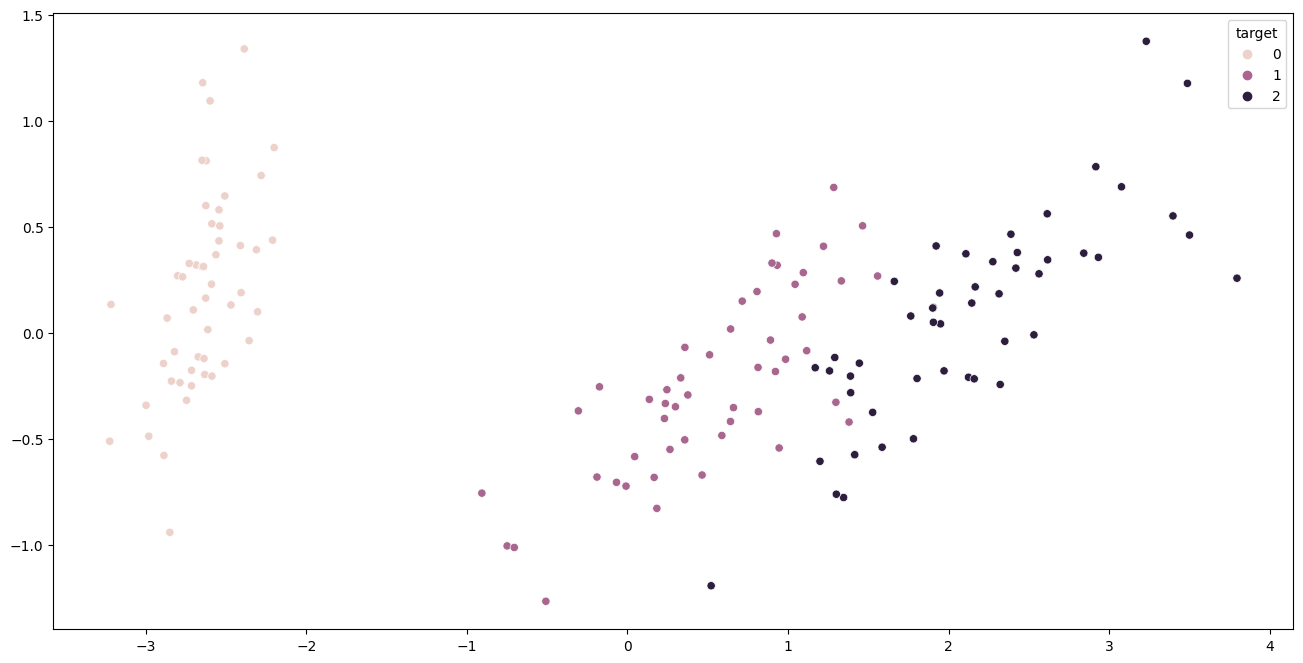

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(16, 8))
sns.scatterplot(x=data[:, 0], y=data[:, 1], hue=df['target'])
plt.show()

## PCA 데이터로 학습

### 데이터셋 분할

In [4]:
from sklearn.model_selection import train_test_split

x_train, x_val, y_train, y_val = train_test_split(data, df[['target']], test_size=0.2, random_state=2021)

print(x_train.shape, y_train.shape)
print(x_val.shape, y_val.shape)

(120, 2) (120, 1)
(30, 2) (30, 1)


### SVM 학습/검증

In [5]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

model = SVC()

model.fit(x_train, y_train['target'])

y_pred = model.predict(x_val)

accuracy_score(y_val, y_pred) * 100

96.66666666666667

## MNIST 데이터셋을 사용한 PCA

이미지 데이터에서도 사용 가능하다!

<img src="https://i.imgur.com/dCtrqUW.png" width="600px">

### MNIST 데이터셋 로드

In [6]:
from sklearn.datasets import load_digits

digits = load_digits()

data = digits['data']
target = digits['target']

### 정규화

In [7]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

scaled = scaler.fit_transform(data)

scaled[0]

array([0.        , 0.        , 0.3125    , 0.8125    , 0.5625    ,
       0.0625    , 0.        , 0.        , 0.        , 0.        ,
       0.8125    , 0.9375    , 0.625     , 0.9375    , 0.3125    ,
       0.        , 0.        , 0.1875    , 0.9375    , 0.125     ,
       0.        , 0.6875    , 0.5       , 0.        , 0.        ,
       0.26666667, 0.75      , 0.        , 0.        , 0.5       ,
       0.53333333, 0.        , 0.        , 0.35714286, 0.5       ,
       0.        , 0.        , 0.5625    , 0.57142857, 0.        ,
       0.        , 0.25      , 0.6875    , 0.        , 0.0625    ,
       0.75      , 0.4375    , 0.        , 0.        , 0.125     ,
       0.875     , 0.3125    , 0.625     , 0.75      , 0.        ,
       0.        , 0.        , 0.        , 0.375     , 0.8125    ,
       0.625     , 0.        , 0.        , 0.        ])

### PCA 수행

In [8]:
from sklearn.decomposition import PCA

pca = PCA(n_components=10)

data_pca = pca.fit_transform(scaled)

data_pca[0]

array([ 0.06114069,  1.37811519, -0.53875229,  0.80781327, -0.4390569 ,
       -0.46746833,  0.20235852,  0.14218739, -0.04392524,  0.22472848])

### 데이터셋 분할

In [9]:
from sklearn.model_selection import train_test_split

x_train, x_val, y_train, y_val = train_test_split(data_pca, target, test_size=0.2, random_state=2021)

print(x_train.shape, y_train.shape)
print(x_val.shape, y_val.shape)

(1437, 10) (1437,)
(360, 10) (360,)


### SVM 학습/검증

In [10]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

model = SVC()

model.fit(x_train, y_train)

y_pred = model.predict(x_val)

accuracy_score(y_val, y_pred) * 100

96.38888888888889

# 머신러닝의 정체

[심화] 현재 우리가 머신러닝이라고 부르는 것의 의미를 상상해보자


## 사람의 얼굴을 구분하는 인공지능은 어떻게 만들까

<img src="https://i.imgur.com/V4quesk.png" width="300px">

## 다시 MNIST로...

우리는 64개의 Feature를 가진 손글씨 숫자 이미지를 PCA 기법을 사용해서 10개의 Feature로 축소시켰다.

<img src="https://i.imgur.com/dCtrqUW.png" width="600px">

## PCA 3차원 그래프

만약 차원을 축소(64차원 -> 3차원)시켜서 3개의 Feature를 더 잘 뽑아낼 수 있다면 계산이 더 쉬워지지 않을까?

In [11]:
from sklearn.datasets import load_digits
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
import plotly.express as px

digits = load_digits()

data = digits['data']
target = digits['target']

scaler = MinMaxScaler()

scaled = scaler.fit_transform(data)

pca = PCA(n_components=3)

data_pca = pca.fit_transform(scaled)

fig = px.scatter_3d(x=data_pca[:, 0], y=data_pca[:, 1], z=data_pca[:, 2], color=target, opacity=0.7)
fig.show()

## 사람 얼굴의 경우

만약 손글씨 숫자 10개를 사람 얼굴 사진이라고 생각한다면..?

<img src="https://i.imgur.com/IV9P1BC.png">

- O: 저장된 오바마 사진
- T: 저장된 트럼프 사진
- I: 새로 들어온 입력 사진 (아직 누군지 모른다)

1. 각각의 사진에서 차원 축소를 하여 3차원 만들고 (x, y, z) 좌표를 추출한다.
2. 각각의 사진과 새로 들어온 입력 사진(I)과의 거리(Distance)를 계산한다.
3. 거리가 가장 가까운 사진으로부터 "오바마"라는 결과를 예측한다.


<img src="https://i.imgur.com/4hkhgdZ.png">

### 3차원에서 거리를 구하는 방법

<img src="https://i.imgur.com/231GIoi.png" width="500px">

# 머신러닝이란 Big 데이터를 n차원 공간에 한 점으로 표시하는 것

> 이래서 수학이 필요합니다

# K-Means Clustering

가장 유명한 군집화 알고리즘

- 중점 Centroid 을 기준으로 가까운 포인트들을 군집화
- 원하는 갯수(K)로 군집화
- 연산 속도가 빠른 편

다양한 군집화 알고리즘 살펴보기

<img src="https://i.imgur.com/QYqfJGr.png" width="800px">

## Iris 데이터셋을 사용한 실습

### 데이터셋 로드

target은 빼고! 우리가 정답을 모른다고 가정합시다.

In [12]:
from sklearn.datasets import load_iris
import pandas as pd

iris = load_iris()

df = pd.DataFrame(iris['data'], columns=iris['feature_names'])
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [13]:
iris['target']

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

### PCA

왜 PCA를 하는 것일까?

In [14]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)

data = pca.fit_transform(df)

data[:5]

array([[-2.68412563,  0.31939725],
       [-2.71414169, -0.17700123],
       [-2.88899057, -0.14494943],
       [-2.74534286, -0.31829898],
       [-2.72871654,  0.32675451]])

### 모델 정의, 학습

몇 개의 군집(Clusters)으로 나눌 것인가

In [15]:
from sklearn.cluster import KMeans

model = KMeans(n_clusters=3)

model.fit(data)

model.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 0, 0, 0, 0, 2, 0, 0, 0,
       0, 0, 0, 2, 2, 0, 0, 0, 0, 2, 0, 2, 0, 2, 0, 0, 2, 2, 0, 0, 0, 0,
       0, 2, 0, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 2], dtype=int32)

### 군집화 결과 시각화

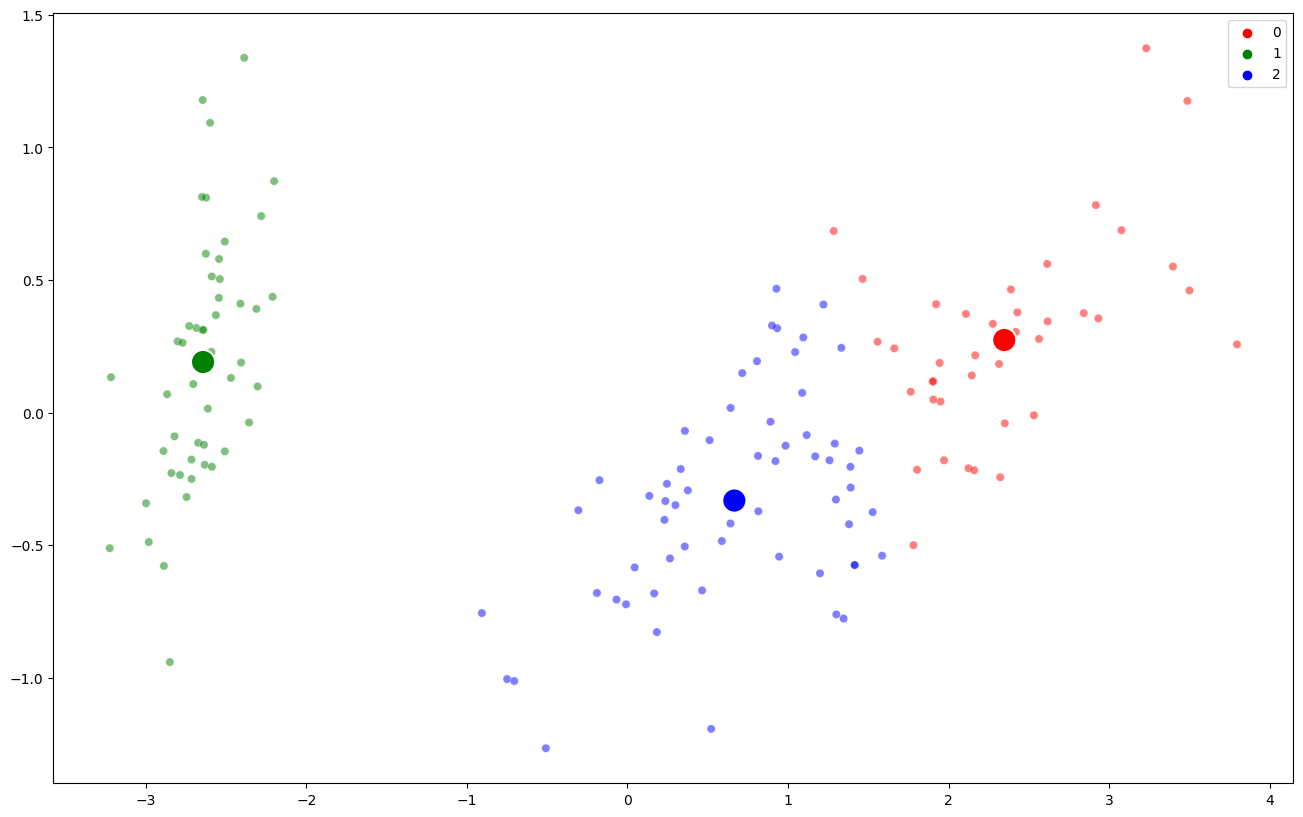

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

colors = ['red', 'green', 'blue']

plt.figure(figsize=(16, 10))
sns.scatterplot(
    x=data[:, 0],
    y=data[:, 1],
    hue=model.labels_,
    palette=colors,
    alpha=0.5,
)
sns.scatterplot(
    x=model.cluster_centers_[:, 0],
    y=model.cluster_centers_[:, 1],
    hue=[0, 1, 2],
    palette=colors,
    s=300,
    legend=False
)
plt.show()

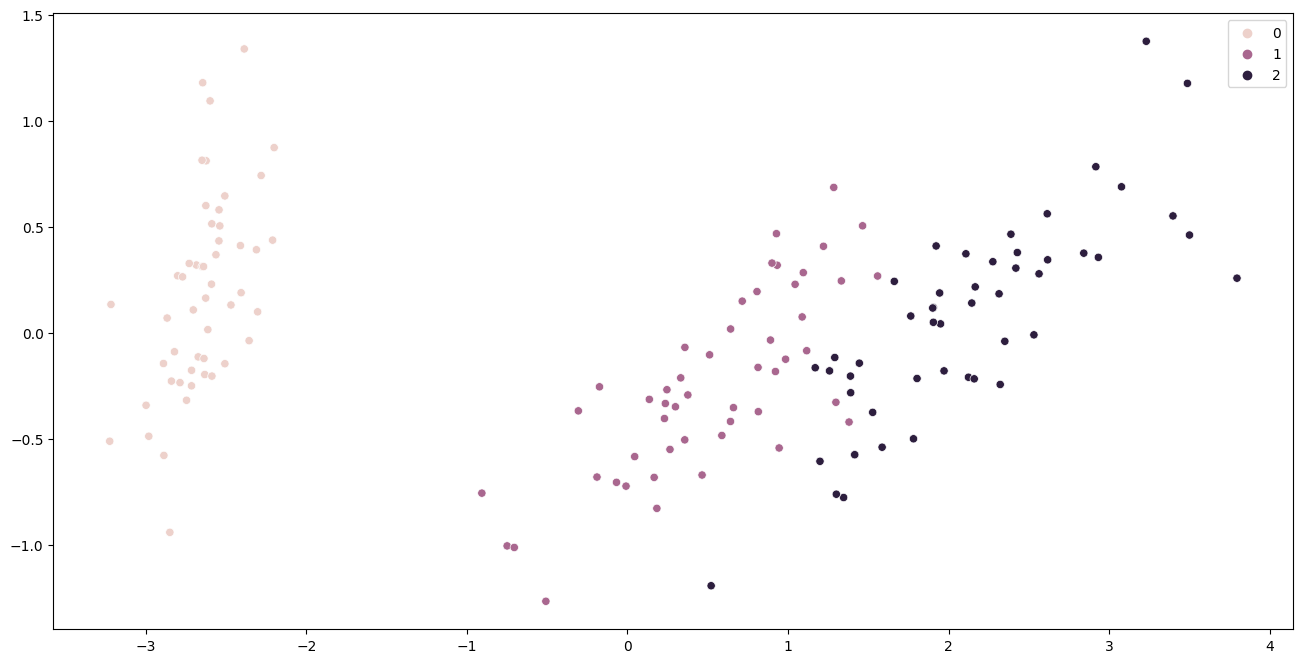

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(16, 8))
sns.scatterplot(x=data[:, 0], y=data[:, 1], hue=iris['target'])
plt.show()

## 군집화 평가 지표

### 실루엣 점수 Silhouette Score

군집화가 얼마나 잘되었는지를 정량적으로 평가하는 지표

- a(i): 응집도 (Cohesion)
- b(i): 분리도 (Separation)

<img src="https://i.imgur.com/YqYzFMr.png" width="500px">

실루엣 점수

- 0: 군집화가 잘 되지 않았다
  - 군집 밀도가 낮고(응집도↑), 군집간 거리가 가깝다(분리도↓)
- 1: 군집화가 잘 되었다
  - 군집 밀도가 높고(응집도↓), 군집간 거리가 멀다(분리도↑)

In [18]:
from sklearn.metrics import silhouette_score

silhouette_score(data, model.labels_)

0.597676421954799

## MNIST에서 K-Means 실습

In [19]:
from sklearn.datasets import load_digits

digits = load_digits()

data = digits['data']
target = digits['target']

In [20]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

scaled = scaler.fit_transform(data)

scaled[0]

array([0.        , 0.        , 0.3125    , 0.8125    , 0.5625    ,
       0.0625    , 0.        , 0.        , 0.        , 0.        ,
       0.8125    , 0.9375    , 0.625     , 0.9375    , 0.3125    ,
       0.        , 0.        , 0.1875    , 0.9375    , 0.125     ,
       0.        , 0.6875    , 0.5       , 0.        , 0.        ,
       0.26666667, 0.75      , 0.        , 0.        , 0.5       ,
       0.53333333, 0.        , 0.        , 0.35714286, 0.5       ,
       0.        , 0.        , 0.5625    , 0.57142857, 0.        ,
       0.        , 0.25      , 0.6875    , 0.        , 0.0625    ,
       0.75      , 0.4375    , 0.        , 0.        , 0.125     ,
       0.875     , 0.3125    , 0.625     , 0.75      , 0.        ,
       0.        , 0.        , 0.        , 0.375     , 0.8125    ,
       0.625     , 0.        , 0.        , 0.        ])

In [21]:
from sklearn.decomposition import PCA

pca = PCA(n_components=10)

data_pca = pca.fit_transform(scaled)

data_pca[0]

array([ 0.06114007,  1.37811778, -0.53875614,  0.80784936, -0.43919446,
       -0.4677572 ,  0.2020552 ,  0.1408392 , -0.04571421,  0.22495505])

In [22]:
from sklearn.cluster import KMeans

model = KMeans(n_clusters=10)

model.fit(data_pca)

model.labels_

array([7, 3, 3, ..., 3, 6, 6], dtype=int32)

In [23]:
from sklearn.metrics import silhouette_score

silhouette_score(data_pca, model.labels_)

0.2649093336131244